In [3]:
from matplotlib import rc
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import aux_functions_3D as aux
import scipy.stats
import xarray

# Plot composite thermal evolution cross sections (Figs. 13 and 14 of the manuscript)
## Files used to make these can be found on the NCCS Data portal (https://portal.nccs.nasa.gov/datashare/giss-camp2ex/) under the 'thermals' directory

In [4]:
def crsection( x, y, U, V, xmin, xmax, ymin, ymax, xlabel=None, ylabel=None, centered_circle=None, title=None, speed_max=None, circle_color='k',streamlines_color='grey',ax=None,Fontsize=None):
    """
    Function used to add streamlines and radius circle to plots.
    """
    speed = np.sqrt( U*U+V*V )
    if speed_max==None:
        speed_max = speed.max()
    lw = 10*speed/speed_max
    lw=0.35
    ax.streamplot( x, y, U, V, linewidth=lw, color=streamlines_color,arrowsize=0.8 )
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    circle = Circle((0,0), centered_circle, facecolor='none', edgecolor=circle_color, linewidth=1.5, zorder=1)
    ax.add_artist(circle)

# CNTL

In [5]:
path = '/discover/nobackup/mwstanfo/acp_camp2ex_ms_data/thermals/'
ncfile = xarray.open_dataset(path+'CNTL_thermals.nc')

## Make a new dictionary that limits time-steps (composites 3D and thermal-averaged values) to +/- of centered time step

In [6]:
num_t_steps = len(ncfile['num_time_steps'].values)
num_thermals = len(ncfile['num_thermals'].values)
print('# of thermals:',num_thermals)
print('# of time steps:',num_t_steps)
tmin = int(ncfile.attrs['tmin'])
tmax = int(ncfile.attrs['tmax'])
t_ref = np.arange(tmin,tmax+1,1)
half_pt = np.where(t_ref == 0.)[0][0]
top_id = 4

lim_dict = {}
lim_dict['udev_3d_mean'] = ncfile['udev_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['u_3d_mean'] = ncfile['u_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['vdev_3d_mean'] = ncfile['vdev_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['v_3d_mean'] = ncfile['v_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['wdev_3d_mean'] = ncfile['wdev_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['w_3d_mean'] = ncfile['w_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['qncloud_3d_mean'] = ncfile['qncloud_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['qcloud_3d_mean'] = ncfile['qcloud_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['qrain_3d_mean'] = ncfile['qrain_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['rho_d_3d_mean'] = ncfile['rho_d_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['sat_3d_mean'] = ncfile['sat_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['w_c_mean'] = np.nanmean(ncfile['W_c'].values,axis=0)[half_pt-3:half_pt+top_id]
lim_dict['qncloud_c_mean'] = np.nanmean(ncfile['qncloud_c'].values,axis=0)[half_pt-3:half_pt+top_id]
lim_dict['qcloud_c_mean'] = np.nanmean(ncfile['qcloud_c'].values,axis=0)[half_pt-3:half_pt+top_id]
lim_dict['qrain_c_mean'] = np.nanmean(ncfile['qrain_c'].values,axis=0)[half_pt-3:half_pt+top_id]

# Thermal-averaged supersaturation as displayed in plots requires averaging over only positive values in the composites
# as opposed to the _c variable
sat_pos_c_mean = []
for tt in range(num_t_steps):
    tmp_sat_3d_mean = ncfile['sat_3d_mean'].values[:,:,:,tt]
    tmp_sat_flat_mean = np.ndarray.flatten(tmp_sat_3d_mean)
    tmp_sat_flat_mean = tmp_sat_flat_mean[tmp_sat_flat_mean > 0.]
    tmp_sat_mean = np.mean(tmp_sat_flat_mean)
    sat_pos_c_mean.append(tmp_sat_mean)
sat_pos_c_mean = np.array(sat_pos_c_mean)[half_pt-3:half_pt+top_id]
lim_dict['sat_c_mean'] = sat_pos_c_mean

# of thermals: 278
# of time steps: 19


### The following defines parameters needed for plotting

In [7]:
x_coor=np.arange(-2.4,2.6,0.2)
y_coor=np.arange(-2.4,2.6,0.2)
z_coor=np.arange(-2.4,2.6,0.2)
circ_r = 1.
mx=1.5
xmin=-mx
xmax=mx
ymin=-mx
ymax=mx
centered_circle=circ_r

zero_contour=True
ticks_fmt='%.1f'
x_contour=0
symmetric=True

x2 = np.zeros(len(x_coor)+1)
x2[:-1] = x_coor-(x_coor[1]-x_coor[0])*0.5
x2[-1]=-x2[0]

X, Y = np.meshgrid(x2, x2)

centre = np.where((y_coor<1e-10)*(y_coor>-1e-10))[0][0]

# Plot Fig. 10 (CNTL)

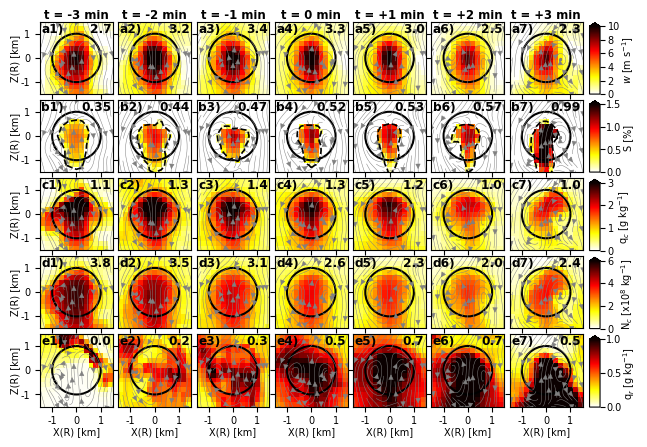

done


In [10]:
#===============================================
# CNTL
#===============================================
num_rows=5
num_cols=7

fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows,figsize=(7,5))
axes_flat = np.ndarray.flatten(axes)

c_color = 'k'
cmap='hot_r'
speed_max = np.amax(np.sqrt(lim_dict['udev_3d_mean']**2. + lim_dict['vdev_3d_mean']**2. + lim_dict['wdev_3d_mean']**2.))

Fontsize=7

for ax in axes_flat:
    ax.tick_params(labelsize=Fontsize)

for ii in range(num_rows):
    for jj in range(num_cols):
        axes[ii,jj].xaxis.set_ticks([-1,0,1])
        axes[ii,jj].yaxis.set_ticks([-1,0,1])
        axes[ii,jj].xaxis.set_ticklabels([])
        axes[ii,jj].yaxis.set_ticklabels([])
        
# X-axis labels
for jj in range(num_cols):
    axes[-1,jj].xaxis.set_ticklabels([-1,0,1])
    axes[-1,jj].set_xlabel('X(R) [km]',fontsize=Fontsize)
    axes[-1,jj].xaxis.labelpad = 0.5
    
# Y-axis labels
for jj in range(num_rows):
    axes[jj,0].yaxis.set_ticklabels([-1,0,1])
    axes[jj,0].set_ylabel('Z(R) [km]',fontsize=Fontsize)
    axes[jj,0].yaxis.labelpad = 0.5

    
# Plot streamlines
for ii in range(num_rows):
    for jj in range(num_cols):
        #crsection( x_coor, z_coor, U_cntl[:,centre,:,jj].transpose(), W_cntl[:,centre,:,jj].transpose(), xmin, xmax, ymin, ymax, xlabel, ylabel, centered_circle, title=title, speed_max=speed_max_cntl,ax=axes[ii,jj],Fontsize=Fontsize,circle_color=c_color )#
        crsection( x_coor, z_coor, lim_dict['udev_3d_mean'][:,centre,:,jj].transpose(), lim_dict['wdev_3d_mean'][:,centre,:,jj].transpose(), xmin, xmax, ymin, ymax, xlabel, ylabel, centered_circle, title=title, speed_max=speed_max,ax=axes[ii,jj],Fontsize=Fontsize,circle_color=c_color )#

centre = np.where((y_coor<1e-10)*(y_coor>-1e-10))[0][0]    
#==============================
# w (vertical Velocity)
#==============================
for ii in range(num_cols):
    vmax=10
    vmin=0
    field = lim_dict['w_3d_mean'][:,:,:,ii]
    data = np.ma.masked_array(field, mask=np.isnan(field))
    w_plot=axes[0,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)
    
#==============================
# S (supersaturation)
#==============================
for ii in range(num_cols):
    vmax=1.5
    vmin=0
    field = lim_dict['sat_3d_mean'][:,:,:,ii]
    data = np.ma.masked_array(field, mask=np.isnan(field))
    sat_plot=axes[1,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)    
    axes[1,ii].contour(x_coor, y_coor, data[:,centre,:].transpose(), 1, levels=[0], linestyles='dashed', zorder=2 ,colors='k',linewidths=1.2)

#==============================
# q_c (cloud water mass mixing ratio)
#==============================
for ii in range(num_cols):
    vmax=3.
    vmin=0
    #field = tmp_qcloud_mean_cntl[:,:,:,ii]*1.e3
    field = lim_dict['qcloud_3d_mean'][:,:,:,ii]*1.e3
    data = np.ma.masked_array(field, mask=np.isnan(field))
    qc_plot=axes[2,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)    

#==============================
# N_c (cloud water number concentation mixing ratio)
#==============================
for ii in range(num_cols):
    vmax=6.
    vmin=0
    #field = tmp_qncloud_mean_cntl[:,:,:,ii]*1.e-8
    field = lim_dict['qncloud_3d_mean'][:,:,:,ii]*1.e-8
    data = np.ma.masked_array(field, mask=np.isnan(field))
    nc_plot=axes[3,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)

#==============================
# q_r (rain water mass mixing ratio)
#==============================
for ii in range(num_cols):
    vmax=1.
    vmin=0
    #field = tmp_qrain_mean_cntl[:,:,:,ii]*1.e3
    field = lim_dict['qrain_3d_mean'][:,:,:,ii]*1.e3
    data = np.ma.masked_array(field, mask=np.isnan(field))
    qr_plot=axes[4,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)

#====================================
# w Colorbar
#====================================
cbar_x = 0.91
cbar_y = 0.735
cbar_len_x = 0.015
cbar_len_y = 0.1425

cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,12,2)
cbar = fig.colorbar(w_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=2)
cbar.ax.set_ylabel('$w$ [m s$^{-1}$]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 0.5

#====================================
# Sat Colorbar
#====================================
cbar_y = 0.579

cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,2,0.5)
cbar = fig.colorbar(sat_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=1)
cbar.ax.set_ylabel('S [%]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 1
#====================================
# qc Colorbar
#====================================
cbar_y = 0.422

cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,4,1)
cbar = fig.colorbar(qc_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=2)
cbar.ax.set_ylabel('q$_{c}$ [g kg$^{-1}$]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 2
#====================================
# Nc Colorbar
#====================================
cbar_y = 0.266

cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,8,2)
cbar = fig.colorbar(nc_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=2)
cbar.ax.set_ylabel('N$_{c}$ [x10$^{8}$ kg$^{-1}$]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 4

#====================================
# qr Colorbar
#====================================
cbar_y = 0.109

cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,1.5,0.5)
cbar = fig.colorbar(qr_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=1)
cbar.ax.set_ylabel('q$_{r}$ [g kg$^{-1}$]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 0.1


alabs = ['a1)','a2)','a3)','a4)','a5)','a6)','a7)']
blabs = ['b1)','b2)','b3)','b4)','b5)','b6)','b7)']
clabs = ['c1)','c2)','c3)','c4)','c5)','c6)','c7)']
dlabs = ['d1)','d2)','d3)','d4)','d5)','d6)','d7)']
elabs = ['e1)','e2)','e3)','e4)','e5)','e6)','e7)']

a_str_list = []
b_str_list = []
c_str_list = []
d_str_list = []
e_str_list = []

for ii in range(7):
    a_str_list.append(str(np.around(lim_dict['w_c_mean'][ii],1)))
    b_str_list.append(str(np.around(lim_dict['sat_c_mean'][ii],2)))
    c_str_list.append(str(np.around(lim_dict['qcloud_c_mean'][ii]*1.e3,1)))
    d_str_list.append(str(np.around(lim_dict['qncloud_c_mean'][ii]*1.e-8,1)))
    e_str_list.append(str(np.around(lim_dict['qrain_c_mean'][ii]*1.e3,1)))
    
    
dumx=0.02
dumy=0.97

dumx2=0.98
dumy2=0.97
for jj in range(num_cols):
    axes[0,jj].text(dumx,dumy,alabs[jj],fontsize=Fontsize*1.25,transform=axes[0,jj].transAxes,va='top',ha='left',fontweight='bold')
    axes[1,jj].text(dumx,dumy,blabs[jj],fontsize=Fontsize*1.25,transform=axes[1,jj].transAxes,va='top',ha='left',fontweight='bold')
    axes[2,jj].text(dumx,dumy,clabs[jj],fontsize=Fontsize*1.25,transform=axes[2,jj].transAxes,va='top',ha='left',fontweight='bold')
    axes[3,jj].text(dumx,dumy,dlabs[jj],fontsize=Fontsize*1.25,transform=axes[3,jj].transAxes,va='top',ha='left',fontweight='bold')
    axes[4,jj].text(dumx,dumy,elabs[jj],fontsize=Fontsize*1.25,transform=axes[4,jj].transAxes,va='top',ha='left',fontweight='bold')
    
    # Mean values in top right corner
    axes[0,jj].text(dumx2,dumy2,a_str_list[jj],fontsize=Fontsize*1.25,transform=axes[0,jj].transAxes,va='top',ha='right',fontweight='bold')
    axes[1,jj].text(dumx2,dumy2,b_str_list[jj],fontsize=Fontsize*1.25,transform=axes[1,jj].transAxes,va='top',ha='right',fontweight='bold')
    axes[2,jj].text(dumx2,dumy2,c_str_list[jj],fontsize=Fontsize*1.25,transform=axes[2,jj].transAxes,va='top',ha='right',fontweight='bold')
    axes[3,jj].text(dumx2,dumy2,d_str_list[jj],fontsize=Fontsize*1.25,transform=axes[3,jj].transAxes,va='top',ha='right',fontweight='bold')
    axes[4,jj].text(dumx2,dumy2,e_str_list[jj],fontsize=Fontsize*1.25,transform=axes[4,jj].transAxes,va='top',ha='right',fontweight='bold')

    
labs = np.array(['t = -3','t = -2','t = -1','t = 0','t = +1','t = +2','t = +3'])
for jj in range(num_cols):
    axes[0,jj].text(0.5,1.16,labs[jj]+' min',fontsize=Fontsize*1.2,fontweight='bold',va='top',ha='center',transform=axes[0,jj].transAxes)
    
    
plt.subplots_adjust(wspace=0.075,hspace=0.075)

fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_cntl_thermals_ev_horizontal.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')
plt.show()
plt.close()  
print('done')

# FIXED_AERO_NO_AC

In [11]:
path = '/discover/nobackup/mwstanfo/acp_camp2ex_ms_data/thermals/'
ncfile = xarray.open_dataset(path+'FIXED_AERO_NO_AC_thermals.nc')

## Make a new dictionary that limits time-steps (composites 3D and thermal-averaged values) to +/- of centered time step

In [12]:
num_t_steps = len(ncfile['num_time_steps'].values)
num_thermals = len(ncfile['num_thermals'].values)
print('# of thermals:',num_thermals)
print('# of time steps:',num_t_steps)
tmin = int(ncfile.attrs['tmin'])
tmax = int(ncfile.attrs['tmax'])
t_ref = np.arange(tmin,tmax+1,1)
half_pt = np.where(t_ref == 0.)[0][0]
top_id = 4

lim_dict = {}
lim_dict['udev_3d_mean'] = ncfile['udev_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['u_3d_mean'] = ncfile['u_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['vdev_3d_mean'] = ncfile['vdev_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['v_3d_mean'] = ncfile['v_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['wdev_3d_mean'] = ncfile['wdev_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['w_3d_mean'] = ncfile['w_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['qncloud_3d_mean'] = ncfile['qncloud_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['qcloud_3d_mean'] = ncfile['qcloud_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['qrain_3d_mean'] = ncfile['qrain_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['rho_d_3d_mean'] = ncfile['rho_d_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['sat_3d_mean'] = ncfile['sat_3d_mean'].values[:,:,:,half_pt-3:half_pt+top_id]
lim_dict['w_c_mean'] = np.nanmean(ncfile['W_c'].values,axis=0)[half_pt-3:half_pt+top_id]
lim_dict['qncloud_c_mean'] = np.nanmean(ncfile['qncloud_c'].values,axis=0)[half_pt-3:half_pt+top_id]
lim_dict['qcloud_c_mean'] = np.nanmean(ncfile['qcloud_c'].values,axis=0)[half_pt-3:half_pt+top_id]
lim_dict['qrain_c_mean'] = np.nanmean(ncfile['qrain_c'].values,axis=0)[half_pt-3:half_pt+top_id]

# Thermal-averaged supersaturation as displayed in plots requires averaging over only positive values in the composites
# as opposed to the _c variable
sat_pos_c_mean = []
for tt in range(num_t_steps):
    tmp_sat_3d_mean = ncfile['sat_3d_mean'].values[:,:,:,tt]
    tmp_sat_flat_mean = np.ndarray.flatten(tmp_sat_3d_mean)
    tmp_sat_flat_mean = tmp_sat_flat_mean[tmp_sat_flat_mean > 0.]
    tmp_sat_mean = np.mean(tmp_sat_flat_mean)
    sat_pos_c_mean.append(tmp_sat_mean)
sat_pos_c_mean = np.array(sat_pos_c_mean)[half_pt-3:half_pt+top_id]
lim_dict['sat_c_mean'] = sat_pos_c_mean

# of thermals: 349
# of time steps: 18


### The following defines parameters needed for plotting

In [13]:
x_coor=np.arange(-2.4,2.6,0.2)
y_coor=np.arange(-2.4,2.6,0.2)
z_coor=np.arange(-2.4,2.6,0.2)
circ_r = 1.
mx=1.5
xmin=-mx
xmax=mx
ymin=-mx
ymax=mx
centered_circle=circ_r

zero_contour=True
ticks_fmt='%.1f'
x_contour=0
symmetric=True

x2 = np.zeros(len(x_coor)+1)
x2[:-1] = x_coor-(x_coor[1]-x_coor[0])*0.5
x2[-1]=-x2[0]

X, Y = np.meshgrid(x2, x2)

centre = np.where((y_coor<1e-10)*(y_coor>-1e-10))[0][0]

# Plot Fig. 12 (FIXED_AERO_NO_AC)

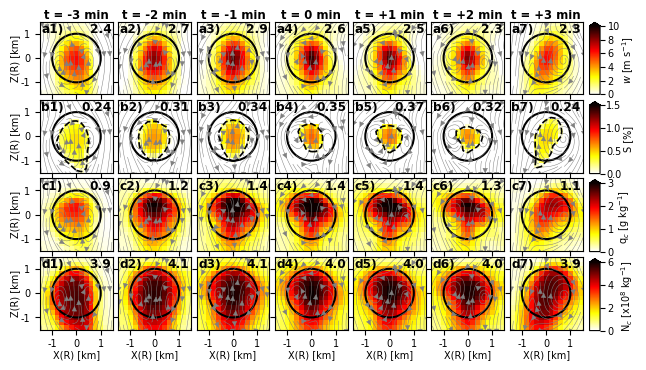

done


In [14]:
#===============================================
# FIXED_AERO_NO_AC
#===============================================
num_rows=4
num_cols=7

fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows,figsize=(7,4))
axes_flat = np.ndarray.flatten(axes)

c_color = 'k'
cmap='hot_r'
speed_max = np.amax(np.sqrt(lim_dict['udev_3d_mean']**2. + lim_dict['vdev_3d_mean']**2. + lim_dict['wdev_3d_mean']**2.))

Fontsize=7

for ax in axes_flat:
    ax.tick_params(labelsize=Fontsize)

for ii in range(num_rows):
    for jj in range(num_cols):
        axes[ii,jj].xaxis.set_ticks([-1,0,1])
        axes[ii,jj].yaxis.set_ticks([-1,0,1])
        axes[ii,jj].xaxis.set_ticklabels([])
        axes[ii,jj].yaxis.set_ticklabels([])
        
# X-axis labels
for jj in range(num_cols):
    axes[-1,jj].xaxis.set_ticklabels([-1,0,1])
    axes[-1,jj].set_xlabel('X(R) [km]',fontsize=Fontsize)
    axes[-1,jj].xaxis.labelpad = 0.5
    
# Y-axis labels
for jj in range(num_rows):
    axes[jj,0].yaxis.set_ticklabels([-1,0,1])
    axes[jj,0].set_ylabel('Z(R) [km]',fontsize=Fontsize)
    axes[jj,0].yaxis.labelpad = 0.5

    
# Plot streamlines
for ii in range(num_rows):
    for jj in range(num_cols):
        crsection( x_coor, z_coor, lim_dict['udev_3d_mean'][:,centre,:,jj].transpose(), lim_dict['wdev_3d_mean'][:,centre,:,jj].transpose(), xmin, xmax, ymin, ymax, xlabel, ylabel, centered_circle, title=title, speed_max=speed_max,ax=axes[ii,jj],Fontsize=Fontsize,circle_color=c_color )#

centre = np.where((y_coor<1e-10)*(y_coor>-1e-10))[0][0]



#==============================
# w (vertical Velocity)
#==============================
for ii in range(num_cols):
    vmax=10
    vmin=0
    field = lim_dict['w_3d_mean'][:,:,:,ii]
    data = np.ma.masked_array(field, mask=np.isnan(field))
    w_plot=axes[0,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)
    
#==============================
# S (supersaturation)
#==============================
for ii in range(num_cols):
    vmax=1.5
    vmin=0
    field = lim_dict['sat_3d_mean'][:,:,:,ii]
    data = np.ma.masked_array(field, mask=np.isnan(field))
    sat_plot=axes[1,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)    
    axes[1,ii].contour(x_coor, y_coor, data[:,centre,:].transpose(), 1, levels=[0], linestyles='dashed', zorder=2 ,colors='k',linewidths=1.2)

#==============================
# q_c (cloud water mass mixing ratio)
#==============================
for ii in range(num_cols):
    vmax=3.
    vmin=0
    #field = tmp_qcloud_mean_cntl[:,:,:,ii]*1.e3
    field = lim_dict['qcloud_3d_mean'][:,:,:,ii]*1.e3
    data = np.ma.masked_array(field, mask=np.isnan(field))
    qc_plot=axes[2,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)    

#==============================
# N_c (cloud water number concentation mixing ratio)
#==============================
for ii in range(num_cols):
    vmax=6.
    vmin=0
    #field = tmp_qncloud_mean_cntl[:,:,:,ii]*1.e-8
    field = lim_dict['qncloud_3d_mean'][:,:,:,ii]*1.e-8
    data = np.ma.masked_array(field, mask=np.isnan(field))
    nc_plot=axes[3,ii].pcolormesh( X, Y, data[:,centre,:].transpose(), vmax=vmax, vmin=vmin, zorder=0, alpha=1, edgecolors='None',cmap=cmap)

#====================================
# w Colorbar
#====================================
cbar_x = 0.91
cbar_len_x = 0.015
cbar_len_y = 0.18

cbar_y = 0.698


cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,12,2)
cbar = fig.colorbar(w_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=2)
cbar.ax.set_ylabel('$w$ [m s$^{-1}$]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 0.5

#====================================
# Sat Colorbar
#====================================
cbar_y = 0.5

cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,2,0.5)
cbar = fig.colorbar(sat_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=1)
cbar.ax.set_ylabel('S [%]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 1
#====================================
# qc Colorbar
#====================================
cbar_y = 0.305

cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,4,1)
cbar = fig.colorbar(qc_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=2)
cbar.ax.set_ylabel('q$_{c}$ [g kg$^{-1}$]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 2
#====================================
# Nc Colorbar
#====================================
cbar_y = 0.1075

cbar_ax = fig.add_axes([cbar_x, cbar_y, cbar_len_x,cbar_len_y])
dum_ticks=np.arange(0,8,2)
cbar = fig.colorbar(nc_plot, cax=cbar_ax,ticks=dum_ticks,orientation='vertical',extend='max')
cbar.ax.tick_params(labelsize=Fontsize,pad=2)
cbar.ax.set_ylabel('N$_{c}$ [x10$^{8}$ kg$^{-1}$]',fontsize=Fontsize)
cbar.ax.yaxis.labelpad = 4

    

alabs = ['a1)','a2)','a3)','a4)','a5)','a6)','a7)']
blabs = ['b1)','b2)','b3)','b4)','b5)','b6)','b7)']
clabs = ['c1)','c2)','c3)','c4)','c5)','c6)','c7)']
dlabs = ['d1)','d2)','d3)','d4)','d5)','d6)','d7)']


a_str_list = []
b_str_list = []
c_str_list = []
d_str_list = []

for ii in range(7):
    a_str_list.append(str(np.around(lim_dict['w_c_mean'][ii],1)))
    b_str_list.append(str(np.around(lim_dict['sat_c_mean'][ii],2)))
    c_str_list.append(str(np.around(lim_dict['qcloud_c_mean'][ii]*1.e3,1)))
    d_str_list.append(str(np.around(lim_dict['qncloud_c_mean'][ii]*1.e-8,1)))
    


dumx=0.02
dumy=0.97
dumx2=0.98
dumy2=0.97
for jj in range(num_cols):
    axes[0,jj].text(dumx,dumy,alabs[jj],fontsize=Fontsize*1.25,transform=axes[0,jj].transAxes,va='top',ha='left',fontweight='bold')
    axes[1,jj].text(dumx,dumy,blabs[jj],fontsize=Fontsize*1.25,transform=axes[1,jj].transAxes,va='top',ha='left',fontweight='bold')
    axes[2,jj].text(dumx,dumy,clabs[jj],fontsize=Fontsize*1.25,transform=axes[2,jj].transAxes,va='top',ha='left',fontweight='bold')
    axes[3,jj].text(dumx,dumy,dlabs[jj],fontsize=Fontsize*1.25,transform=axes[3,jj].transAxes,va='top',ha='left',fontweight='bold')

    
    # Mean values in top right corner
    axes[0,jj].text(dumx2,dumy2,a_str_list[jj],fontsize=Fontsize*1.25,transform=axes[0,jj].transAxes,va='top',ha='right',fontweight='bold')
    axes[1,jj].text(dumx2,dumy2,b_str_list[jj],fontsize=Fontsize*1.25,transform=axes[1,jj].transAxes,va='top',ha='right',fontweight='bold')
    axes[2,jj].text(dumx2,dumy2,c_str_list[jj],fontsize=Fontsize*1.25,transform=axes[2,jj].transAxes,va='top',ha='right',fontweight='bold')
    axes[3,jj].text(dumx2,dumy2,d_str_list[jj],fontsize=Fontsize*1.25,transform=axes[3,jj].transAxes,va='top',ha='right',fontweight='bold')

    
labs = np.array(['t = -3','t = -2','t = -1','t = 0','t = +1','t = +2','t = +3'])
for jj in range(num_cols):
    axes[0,jj].text(0.5,1.16,labs[jj]+' min',fontsize=Fontsize*1.2,fontweight='bold',va='top',ha='center',transform=axes[0,jj].transAxes)
    
    
plt.subplots_adjust(wspace=0.075,hspace=0.075)

fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_sens_thermals_ev_horizontal.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')
plt.show()
plt.close()  
print('done')